In [1]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
X = boston['data']
y = boston['target']

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeRegressor

m_tree = DecisionTreeRegressor(max_depth = 5)
m_tree.fit(X_train, y_train)
ypred = m_tree.predict(X_test)
m_tree.score(X_train,y_train), m_tree.score(X_test,y_test)

(0.9279670756851799, 0.70778751037532)

## Bagging vs Boosting

The bootstrapping used by Random Forest uses sampling with replacement. In bagging every sample has the same probability of being selected. In boosting the estimators are run sequentially and the samples are weighted each time.

As the weights are increasing for the misclassified samples (in the error function), improving these become more important in the next iteration. 



https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

## Gradient Boosting

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

**Check out catboost that supports also categorical features**

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
m_gbr = GradientBoostingRegressor()
m_gbr.fit(X_train, y_train)
ypred = m_gbr.predict(X_test)
m_gbr.score(X_train,y_train), m_gbr.score(X_test,y_test)

(0.9785520655757387, 0.8733827077328833)

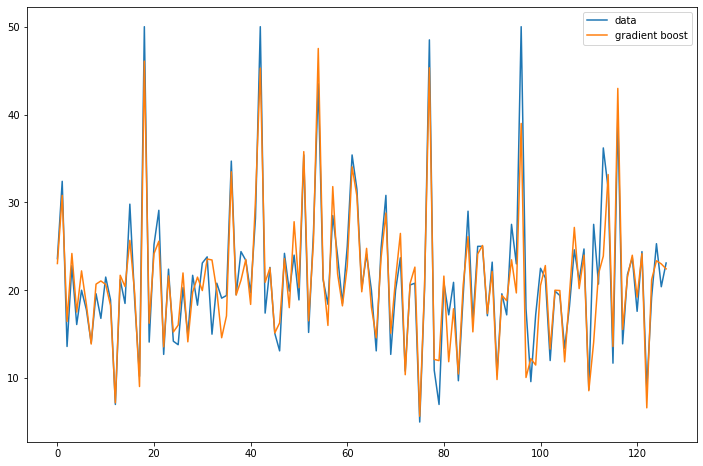

In [6]:
plt.figure(figsize=(12,8))
plt.plot(y_test)
plt.plot(ypred)
plt.legend(['data','gradient boost'])

## Support Vector Machines

In support vectors, you both try to increase the width of the margin separating classes and decrease the distance of misclassified samples to their actual classes.

Check out Kernel trick, to transform data to higher dimension, in or

For classifiers: https://krspiced.pythonanywhere.com/chapters/project_titanic/support_vector_machines/README.html  

For regressors:
https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

For the Kernel Trick: https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f


In [7]:
from sklearn.svm import SVR

m_svr = SVR(C=500, epsilon=0.3)
m_svr.fit(X_train,y_train)
y_pred_svr = m_svr.predict(X_test)

m_svr.score(X_train,y_train), m_svr.score(X_test,y_test)

(0.6049649260630384, 0.6569130254718006)

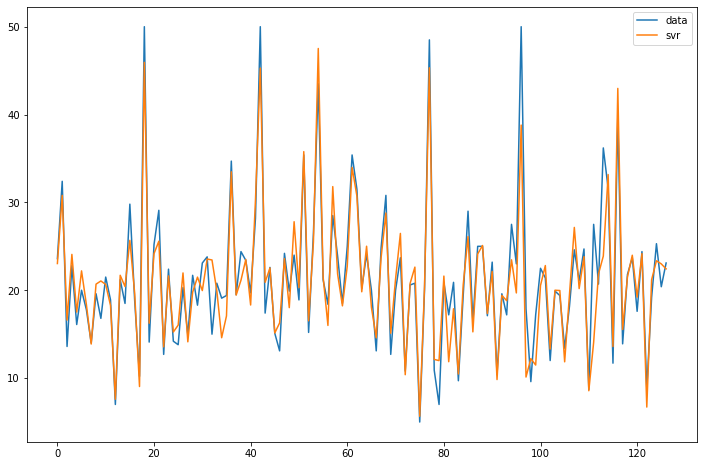

In [8]:
plt.figure(figsize=(12,8))
plt.plot(y_test)
plt.plot(ypred)
#plt.plot(prediction)
plt.legend(['data','svr'])

## Features

In [9]:
import pandas as pd

df=pd.DataFrame(data=X,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**But now just brief reminders**

- One Hot Encoding (for categorical variables)
- Scaling, normalisation
- Dropping or imputing NAs 
        - eg. 
        
              df=pd.DataFrame(data=X,columns=boston.feature_names)
             
              df['ZN'].fillna(df.groupby('RAD')['ZN'].mean())

- Cleaning outliers (quantiles)
- Binning, grouping
- Polynomial features
- Feature reduction (rf.feature_importances, principal components).

### Classifiers

#### Logistic Regression 

Logit function with boundaries between 0 and 1, corresponding to the probabilities.

- m.coef_
- m.predict.proba_()

Hyperparameters:
- L1 or L2, elasticnet penalties
- class_weight


#### Random Forest

Bagging through bootstrapping

- Depth: Decreasing it decreases variance - avoids overfitting.

- Number of estimators (trees): Increasing it minimises bias - better representation of the training.

#### Support Vector Machines

Separating classes from each other with the help of the largest possible margin defined by support vectors (closest points to the boundary of the classes). It might use a method called Kernel trick to project data to higher dimentions to find easier hyperplanes.

Smaller C means a **smaller margin** (for classification).

You can also try a **soft margin**, so that by allowing some bad classifications, you manage to keep a larger overall margin and improve results.

### REGRESSORS

#### Linear Regression


$$y=𝑋⋅𝑤^𝑇 = w_0 + w_1 x_1 +...$$


Check out the regressors of all of the classifiers we have; SVR, RFR, etc.



Loss functions and Gradient Descent


### Evaluating classifiers

- Accuracy: The percentage of correct guesses
- Precision: Minimising false positives
- Recall: Minimising false negatives 
- ROC curves: Studying probability thresholds for classifier selection

### Evaluating regressors

- MSE - good if you care about outliers
- RMSE - interpretable: Is first squared and then averaged which gets affected by larger errors more (so better to use when you really want to avoid larger errors altogether).
- MAE - also interpretable
- RMSLE - underestimates get stronger penalty
- $R^2$ - proportion of the variance explained by your model

### MORE QUALITY CHECKS

* Cross-Validation (to check you didn't get lucky with your train-test split)

* GridSearchCV (hyperparameter optimisation)

* **Test scores** tell you how good your model is, **training scores** do however show whether it is worth doing hyperparameter optimisation to reduce overfitting.

* Checking correlations, multicollinearity.

* Error analysis (normality, variance constant).